In [9]:
# Replace 'your_capture_file.pcapng' with the path to your actual packet capture file
import pyshark
import matplotlib.pyplot as plt
import nest_asyncio
import torch
nest_asyncio.apply()

def function_vp(file_name):
    print(file_name)
    cap = pyshark.FileCapture(file_name)
    packet_ip=''
    for packet in cap:
        if 'DNS' in packet:
            packet_ip = packet.ip.src
            break
    up_list = torch.zeros(601)
    down_list = torch.zeros(601)
    
    for packet in cap:
        if 'IP' in packet:
            snif_time = float(packet.frame_info.time_relative)
            index = int(snif_time/0.1)
            if (snif_time-(index*0.1))!=0:
                index = index + 1
            if index>600:
                continue
            if (packet.ip.src==packet_ip):
                up_list[index] = up_list[index] + 1
            else:
                down_list[index] = down_list[index] + 1
    return up_list,down_list

youtube_480.pcap
youtube_720.pcap
youtube_1080.pcap
youtube_2k.pcap
youtube_4k.pcap


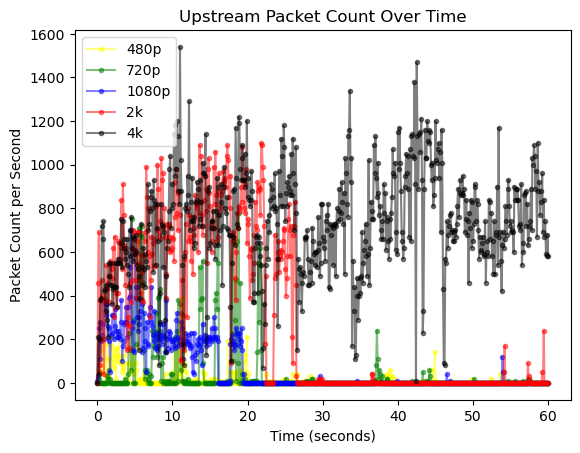

In [10]:
up_list1,down_list1 = function_vp('youtube_480.pcap')
up_list2,down_list2 = function_vp('youtube_720.pcap')
up_list3,down_list3 = function_vp('youtube_1080.pcap')
up_list4,down_list4 = function_vp('youtube_2k.pcap')
up_list5,down_list5 = function_vp('youtube_4k.pcap')
x_values = torch.linspace(0, 60, 601)

# Plotting the graph
plt.plot(x_values.numpy(), (up_list1*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='yellow', label='480p')
plt.plot(x_values.numpy(), (up_list2*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='green', label='720p')
plt.plot(x_values.numpy(), (up_list3*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='blue', label='1080p')
plt.plot(x_values.numpy(), (up_list4*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='red', label='2k')
plt.plot(x_values.numpy(), (up_list5*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='black', label='4k')

plt.title('Upstream Packet Count Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Packet Count per Second')
plt.legend()
plt.show()

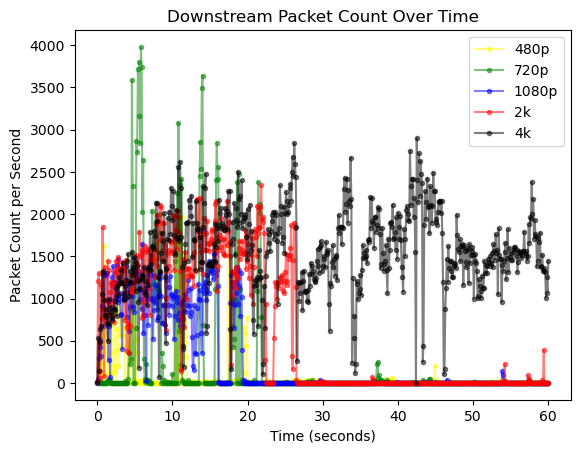

In [11]:
# Plotting the graph
plt.plot(x_values.numpy(), (down_list1*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='yellow', label='480p')
plt.plot(x_values.numpy(), (down_list2*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='green', label='720p')
plt.plot(x_values.numpy(), (down_list3*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='blue', label='1080p')
plt.plot(x_values.numpy(), (down_list4*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='red', label='2k')
plt.plot(x_values.numpy(), (down_list5*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='black', label='4k')

plt.title('Downstream Packet Count Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Packet Count per Second')
plt.legend()
plt.show()

In [12]:
count = 0
for i in range(601):
    if (down_list1[i] > 100):
        count = count + 1
print(f"fraction of burst slots in 480p are {count/601}")
count = 0
for i in range(601):
    if (down_list2[i] > 100):
        count = count + 1
print(f"fraction of burst slots in 720p are {count/601}")
count = 0
for i in range(601):
    if (down_list3[i] > 100):
        count = count + 1
print(f"fraction of burst slots in 1080p are {count/601}")
count = 0
for i in range(601):
    if (down_list4[i] > 100):
        count = count + 1
print(f"fraction of burst slots in 2k are {count/601}")
count = 0
for i in range(601):
    if (down_list5[i] > 100):
        count = count + 1
print(f"fraction of burst slots in 4k are {count/601}")

fraction of burst slots in 480p are 0.019966722129783693
fraction of burst slots in 720p are 0.07487520798668885
fraction of burst slots in 1080p are 0.15307820299500832
fraction of burst slots in 2k are 0.3610648918469218
fraction of burst slots in 4k are 0.8935108153078203


In [13]:
# Replace 'your_capture_file.pcapng' with the path to your actual packet capture file
import pyshark
import matplotlib.pyplot as plt
import nest_asyncio
import torch
nest_asyncio.apply()

def get_packet_size(packet):
    if "IP" in packet and "length" in packet.ip.field_names:
        return int(packet.ip.length)
    elif "TCP" in packet and "length" in packet.tcp.field_names:
        return int(packet.tcp.length)
    elif "UDP" in packet and "length" in packet.udp.field_names:
        return int(packet.udp.length)
    else:
        return 0

def function_vp(file_name):
    print(file_name)
    cap = pyshark.FileCapture(file_name)
    packet_ip=''
    for packet in cap:
        if 'DNS' in packet:
            packet_ip = packet.ip.src
            break
    up_list = torch.zeros(601)
    down_list = torch.zeros(601)
    
    for packet in cap:
        if 'IP' in packet:
            snif_time = float(packet.frame_info.time_relative)
            index = int(snif_time/0.1)
            if (snif_time-(index*0.1))!=0:
                index = index + 1
            if index>600:
                continue
            if (packet.ip.src==packet_ip):
                up_list[index] = up_list[index] + get_packet_size(packet)
            else:
                down_list[index] = down_list[index] + get_packet_size(packet)
    return up_list/1024,down_list/1024

youtube_480.pcap
youtube_720.pcap
youtube_1080.pcap
youtube_2k.pcap
youtube_4k.pcap


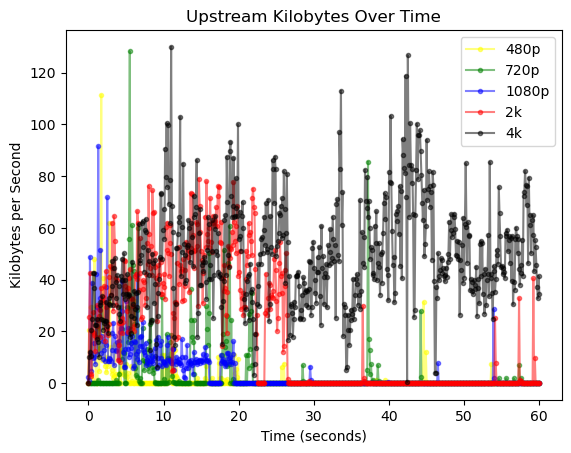

In [14]:
up_list1,down_list1 = function_vp('youtube_480.pcap')
up_list2,down_list2 = function_vp('youtube_720.pcap')
up_list3,down_list3 = function_vp('youtube_1080.pcap')
up_list4,down_list4 = function_vp('youtube_2k.pcap')
up_list5,down_list5 = function_vp('youtube_4k.pcap')
x_values = torch.linspace(0, 60, 601)

# Plotting the graph
plt.plot(x_values.numpy(), (up_list1*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='yellow', label='480p')
plt.plot(x_values.numpy(), (up_list2*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='green', label='720p')
plt.plot(x_values.numpy(), (up_list3*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='blue', label='1080p')
plt.plot(x_values.numpy(), (up_list4*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='red', label='2k')
plt.plot(x_values.numpy(), (up_list5*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='black', label='4k')

plt.title('Upstream Kilobytes Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Kilobytes per Second')
plt.legend()
plt.show()

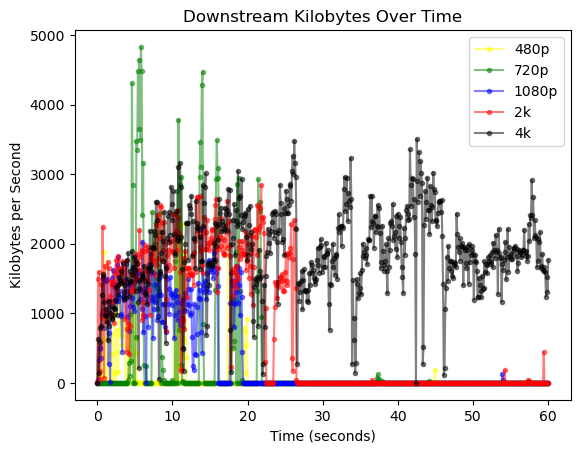

In [15]:
# Plotting the graph
plt.plot(x_values.numpy(), (down_list1*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='yellow', label='480p')
plt.plot(x_values.numpy(), (down_list2*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='green', label='720p')
plt.plot(x_values.numpy(), (down_list3*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='blue', label='1080p')
plt.plot(x_values.numpy(), (down_list4*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='red', label='2k')
plt.plot(x_values.numpy(), (down_list5*10).numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='black', label='4k')

plt.title('Downstream Kilobytes Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Kilobytes per Second')
plt.legend()
plt.show()

In [16]:
# def function_tdt(file_name):
#     print(file_name)
#     cap = pyshark.FileCapture(file_name)
#     dns_query_times = {}
#     for packet in cap:
#         if 'DNS' in packet and hasattr(packet.dns, 'query_name'):
#             website = packet.dns.query_name
#             timestamp = float(packet.frame_info.time_relative)

#             # Store the timestamp for the first DNS query for each website
#             if website not in dns_query_times:
#                 dns_query_times[website] = timestamp

#     # Calculate the total time for DNS queries
#     total_dns_time = sum(dns_query_times.values())
#     return total_dns_time
# print(function_tdt('pradyy.pcap'))

In [74]:
# Replace 'your_capture_file.pcapng' with the path to your actual packet capture file
import pyshark
import matplotlib.pyplot as plt
import nest_asyncio
import torch
nest_asyncio.apply()

def get_packet_size(packet):
    if "IP" in packet and "length" in packet.ip.field_names:
        return int(packet.ip.length)
    elif "TCP" in packet and "length" in packet.tcp.field_names:
        return int(packet.tcp.length)
    elif "UDP" in packet and "length" in packet.udp.field_names:
        return int(packet.udp.length)
    else:
        return 0

def cummulative_per(down_list):
    N = 0
    for i in range(101):
        N=N + down_list[i]
    c = 0
    for i in range(101):
        c = c + down_list[i]
        down_list[i] = c/N
        down_list[i] = down_list[i] * 100
    return down_list

def q1B3(file_name):
    print(file_name)
    cap = pyshark.FileCapture(file_name)
    packet_ip=''
    for packet in cap:
        if 'DNS' in packet:
            packet_ip = packet.ip.src
            break
    up_list = torch.zeros(101)
    down_list = torch.zeros(101)
    
    for packet in cap:
        if 'IP' in packet:
            snif_time = float(packet.frame_info.time_relative)
            index = int(snif_time/0.1)
            if (snif_time-(index*0.1))!=0:
                index = index + 1
            if index>100:
                continue
            if (packet.ip.src==packet_ip):
                up_list[index] = up_list[index] + get_packet_size(packet)
            else:
                down_list[index] = down_list[index] + get_packet_size(packet)
    return cummulative_per(down_list/1024)

jagran.pcap
mit.pcap
sinu.pcap
deccan.pcap
usach.pcap


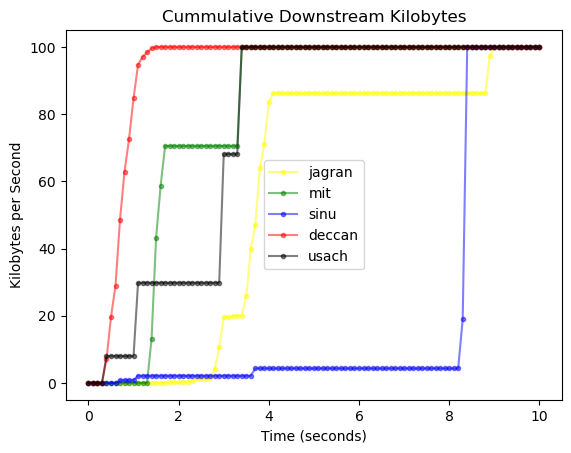

In [75]:
down1 = q1B3('jagran.pcap')
down2 = q1B3('mit.pcap')
down3 = q1B3('sinu.pcap')
down4 = q1B3('deccan.pcap')
down5 = q1B3('usach.pcap')
x_values = torch.linspace(0, 10, 101)
plt.plot(x_values.numpy(), down1.numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='yellow', label='jagran')
plt.plot(x_values.numpy(), down2.numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='green', label='mit')
plt.plot(x_values.numpy(), down3.numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='blue', label='sinu')
plt.plot(x_values.numpy(), down4.numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='red', label='deccan')
plt.plot(x_values.numpy(), down5.numpy(), marker='o',markersize = 3, alpha = 0.5 , linestyle='-', color='black', label='usach')
plt.title('Cummulative Downstream Kilobytes')
plt.xlabel('Time (seconds)')
plt.ylabel('Kilobytes per Second')
plt.legend()
plt.show()

In [76]:
import pyshark
import nest_asyncio
nest_asyncio.apply()

def q1B1(file_name):
    cap = pyshark.FileCapture(file_name)
    dns_id= ' '
    packet_ip = ' '
    start = 0
    end = 0
    for packet in cap:
        if 'DNS' in packet and 'IP' in packet:
            packet_ip = packet.ip.src
            dns_id = packet.dns.id
            start = float(packet.frame_info.time_relative)
            break
    # print(dns_id)
    for packet in cap:
        if 'IP' in packet and 'DNS' in packet:
            if (packet.ip.src!=packet_ip) and (packet.dns.id==dns_id):
                end = float(packet.frame_info.time_relative)
    return end - start

In [77]:
print(f"total time required for DNS query for deccan is {q1B1('deccan.pcap')}")
print(f"total time required for DNS query for jagran is {q1B1('jagran.pcap')}")
print(f"total time required for DNS query for mit is {q1B1('mit.pcap')}")
print(f"total time required for DNS query for sinu is {q1B1('sinu.pcap')}")
print(f"total time required for DNS query for usach is {q1B1('usach.pcap')}")

total time required for DNS query for deccan is 0.03372899999999995
total time required for DNS query for jagran is 0.04550900000000002
total time required for DNS query for mit is 0.05657800000000002
total time required for DNS query for sinu is 0.48806700000000003
total time required for DNS query for usach is 0.385584


In [78]:
import pyshark
import nest_asyncio
nest_asyncio.apply()

def q1B2(file_name):
    cap = pyshark.FileCapture(file_name)
    dns_id= ' '
    packet_ip = ' '
    start = 0
    end = 0
    for packet in cap:
        if 'DNS' in packet:
            packet_ip = packet.ip.src
            dns_id = packet.dns.id
            start = float(packet.frame_info.time_relative)
            break
    # print(dns_id)
    checking = True
    for packet in cap:
        if 'TLS' in packet:
            if checking:
                if 'handshake' in packet.tls.field_names:
                    if 'Handshake Protocol: Server Hello' in packet.tls.handshake:
                        if hasattr(packet.tls, 'app_data'):
                            end = float((packet.frame_info.time_relative))
                            break
                        else:
                            checking =False
            elif hasattr(packet.tls, 'app_data'):
                end = float((packet.frame_info.time_relative))
                break
    return end - start

In [79]:
print(f"ttfb for deccan is {q1B2('deccan.pcap')}")
print(f"ttfb for jagran is {q1B2('jagran.pcap')}")
print(f"ttfb for mit is {q1B2('mit.pcap')}")
print(f"ttfb for sinu is {q1B2('sinu.pcap')}")
print(f"ttfb for usach is {q1B2('usach.pcap')}")

ttfb for deccan is 0.238464
ttfb for jagran is 0.1150730000000002
ttfb for mit is 0.10441699999999998
ttfb for sinu is 1.1238869999999999
ttfb for usach is 2.243272
